# Backpropagation

## Backpropagation

## Implementation of Simple Layers

### Multiplication Layer
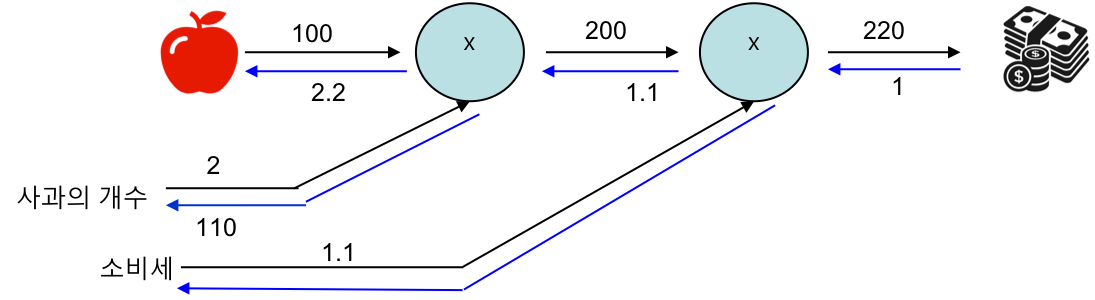

In [1]:
#신경망 구성하는 층(계층) 각각을 하나의 클래스로 구현 
#기능 단위 별 구현 
class MulLayer: #곱셈 계층
    def __init__(self): #인스턴스 변수 x, y 초기화-> 순전파 시 입력 값 유지 
        self.x = None
        self.y = None

    def forward(self, x, y): #순전파: X와 y를 인수로 받은 수 곱하여 반환
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout): #역전파: 상류의 미분에 서로 바꿔 곱한 후 전달
        dx = dout * self.y #dout=미분, X와 Y값을 바꿔 전달 
        dy = dout * self.x

        return dx, dy

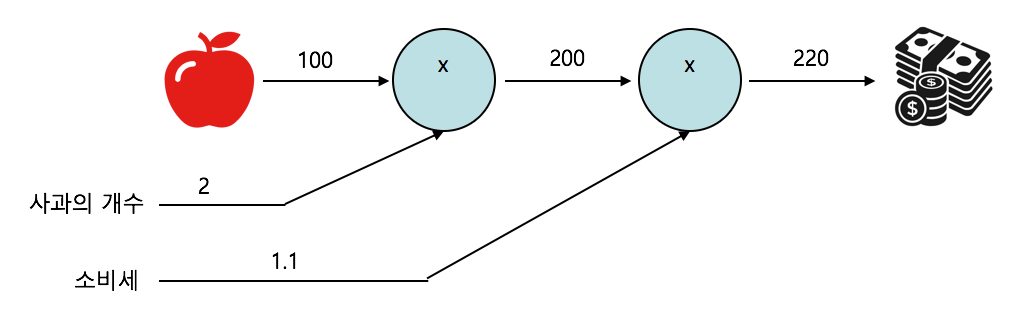

In [2]:
apple = 100
apple_num = 2
tax = 1.1

In [3]:
#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

In [4]:
#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

In [5]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

In [8]:
print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)
# print("dapple_Price:",dapple_price )

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


### Addition Layer
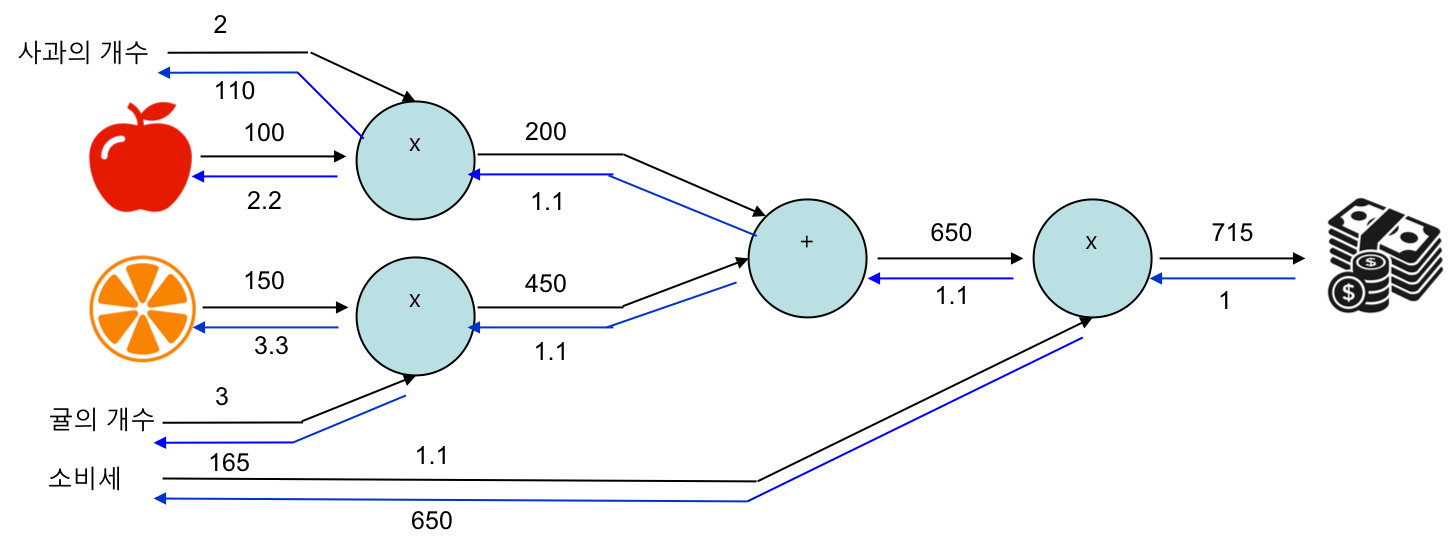

In [9]:
class AddLayer: #초기화 필요 없음
    def __init__(self):
        pass

    def forward(self, x, y): #입력 변수 더하여 반환
        out = x + y

        return out

    def backward(self, dout): #
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [11]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [12]:
#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

In [13]:
#순전파
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

In [14]:
#역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

In [15]:
print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## Implementation Activation Function Layer

### ReLU Layer

In [16]:
#mask는 True/False로 구성된 넘파이 배열
# 순전파의 입력인 X의 값이 0 이하면 True, 그외(0 이상)인 경우는 False
class Relu:
    def __init__(self):
        self.mask = None 
#mask는 True/False로 구성된 넘파이 배열
#순전파의 입력인 X의 원소 값이 0 이하면 True, 0보다 크면 False 유지 
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

# 순전파 때의 입력 값이 0 이하인 경우-> 역전파 때의 값은 0
# 순전파 때 만들어둔 mask를 통해 mask의 원소가 True인 경우 상류에서 전파된 dout값을 0으로 설정
    def backward(self, dout): 
        dout[self.mask] = 0 
        dx = dout
        
        return dx

In [17]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [18]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


In [19]:
#mask example
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = (x<=0)
print(x)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### Sigmoid Layer

In [20]:
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    #순전파의 출력을 변수 Out에 보관했다가, 역전파 때 그 변수를 사용하여 계산 수행(미분)
    def backward(self, dout):
        dx = dout * (1.0 - self.out)* self.out 
        
        return dx

## Implementation Affin/Softmax Layer

### Affine Layer

In [21]:
X = np.random.rand(2) #입력
W = np.random.rand(2, 3) # 가중치
B = np.random.rand(3) #편향

In [47]:
print(X.shape)
print(W.shape)
print(B.shape)
print(X)
print(W)
print(B) 

(2,)
(2, 3)
(3,)
[0.47810303 0.16138501]
[[0.14876765 0.69952764 0.74984715]
 [0.18351634 0.97670889 0.03423282]]
[1 2 3]


In [48]:
# 뉴런의 가중치 합 
Y = np.dot(X, W) + B
print(Y)

[1.10074305 2.49207246 3.36402886]


### Affine Layer for Batch

In [24]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

In [25]:
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [26]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [27]:
#순전파의 편향 덧셈
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
#역잔파의 편향은 두 데이터에 대한 미분을 데이터 마다 구함
dB = np.sum(dY, axis = 0)
dB

array([5, 7, 9])

In [29]:
class Affine:
    def __init__(self, w, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backword(self, out):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

### Softmax-with-Loss Layer

In [30]:
def softmax(matrix):
    maximum_of_matrix = np.max(matrix)
    difference_from_maximum = matrix - maximum_of_matrix
    exponential_of_difference = np.exp(difference_from_maximum)
    sum_of_exponential = np.sum(exponential_of_difference)
    y = exponential_of_difference / sum_of_exponential
    return y
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None #손실
        self.y = None #sofrmax의 출력
        self.t = None #정답 레이블(원 핫 벡터)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

## Implementation Backpropagation

### Flow of Learning Neural Network

#### 전제

신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 합니다. 신경망 학습은 다음과 같이 4단계로 수행

1. 미니배치
    - 훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표
2. 기울기 산출
    - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 적게 하는 방향을 제시
3. 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
4. 반복
    - 1 ~ 3단계를 반복

### Implementation Neural Network applied Backpropagation

In [31]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)        
    if t.size == y.size:
        t = t.argmax(axis=1)             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

In [32]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [33]:
import sys, os
import numpy as np
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
#가중치 초기화, 딕셔너리 변수, 신경망의 매개변수 보관
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)
#계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
#신경망의 마지막 계층
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
#x: 입력데이터, t: 정답레이블        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
#x: 입력데이터, t: 정답레이블        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
#결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

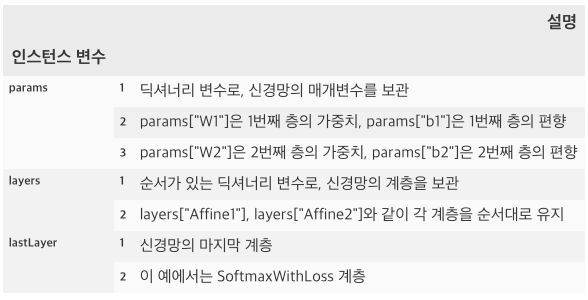

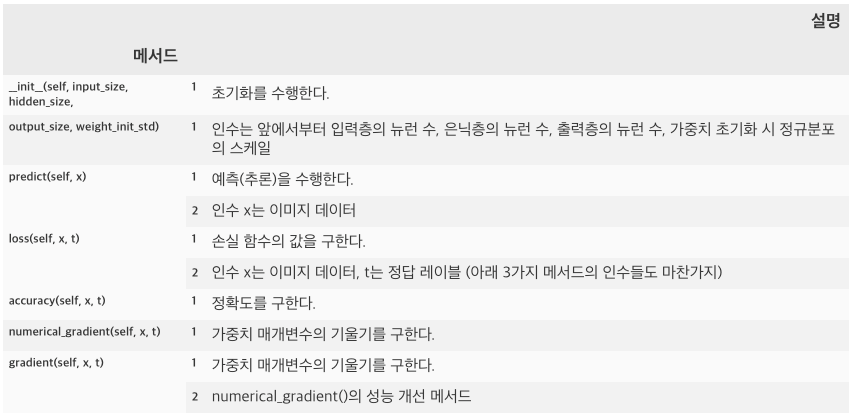

### Implementation Slope from Backpropagation

In [34]:
#수치 미분 값과 오차 역전파법의 기울기가 같은지 확인 
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [35]:
#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [36]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [37]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [38]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

In [39]:
#각 가중치의 절대 오차의 평균을 구함
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:3.0950559085259594e-10
b1:1.843065159312603e-09
W2:4.7320523736514445e-09
b2:1.3982069491658144e-07


### Implementation Learning Using Backpropagation

In [40]:
#기존과의 차이점은 기울기를 오차역전파법으로 구한다는 것 
import sys, os
sys.path.append("./dataset")
import numpy as np
import pickle
from mnist import load_mnist
import matplotlib.pylab as plt

In [41]:
#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [42]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [43]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

In [44]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [45]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

#오자역전파법으로 기울기 구함 
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
# 값 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.13551666666666667 0.1376
0.9001333333333333 0.9024
0.9247166666666666 0.9235
0.9341666666666667 0.9348
0.9445 0.9432
0.9493833333333334 0.9474
0.95685 0.9522
0.9613166666666667 0.9582
0.9635833333333333 0.9589
0.96705 0.9614
0.96895 0.962
0.9711666666666666 0.9641
0.9732 0.967
0.9749666666666666 0.9673
0.9749333333333333 0.9665
0.9764166666666667 0.9681
0.9787833333333333 0.9698


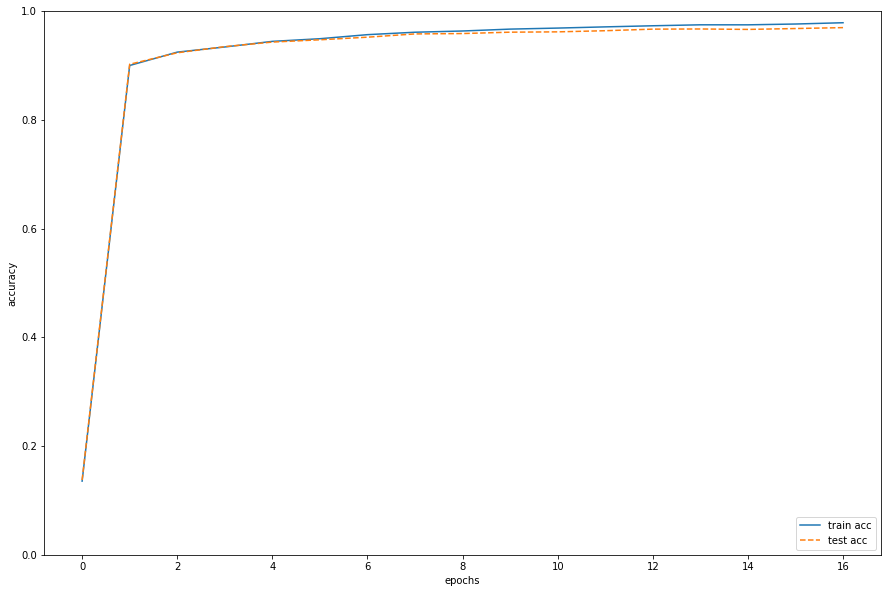

In [46]:
#그래프 확인
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.figure(figsize = (15, 10))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()